# Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

In [16]:
app_train = pd.read_csv('application_train.csv')

# Data

In [17]:
app_train.shape

(307511, 122)

In [18]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Distribution de la target

In [19]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution de la target')

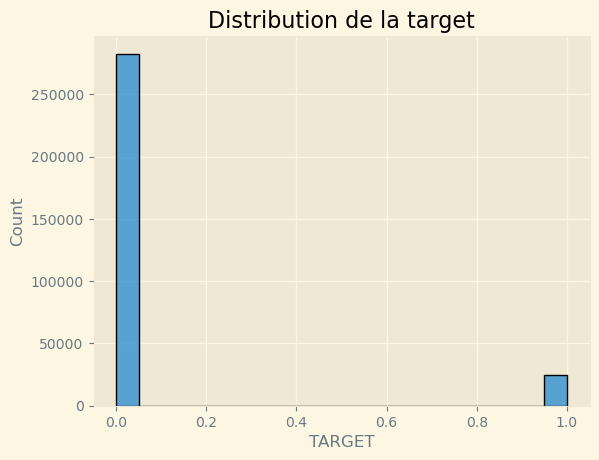

In [14]:
plt.style.use('Solarize_Light2')
sns.histplot(app_train['TARGET'])
plt.title('Distribution de la target')


=> Déséquilibre entre les classes 

## Valeurs manquantes

In [398]:
miss_val = (app_train.isna().mean()*100).sort_values(ascending=False).head(30)
print(miss_val.head(20))

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
dtype: float64


Text(0.5, 1.0, 'Les 20 features avec le plus de valeurs manquantes')

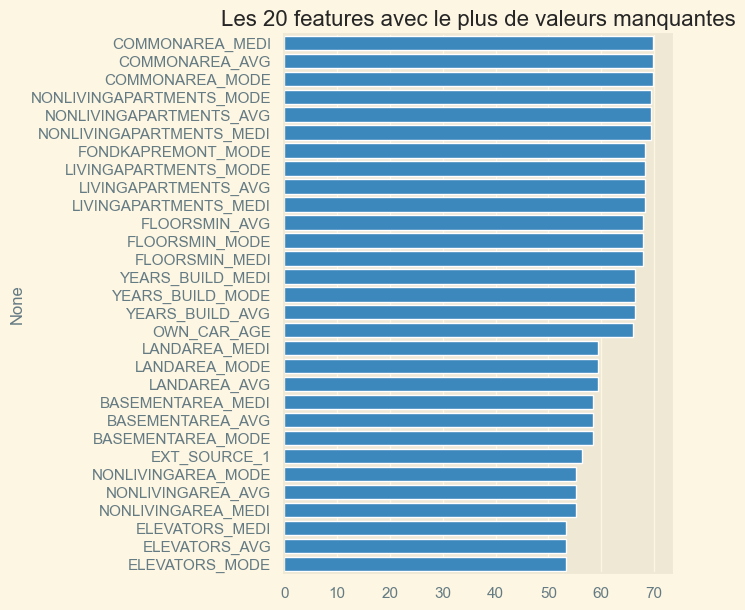

In [399]:
plt.figure(figsize=(5, 7))

sns.barplot(y=miss_val.index, x=miss_val.values)
plt.title('Les 20 features avec le plus de valeurs manquantes')

In [400]:
app_train.isna().sum().sum()

9152465

## Encodage variables catégorielles 

In [401]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [402]:
app_train.select_dtypes('object').nunique().sort_values()

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

In [405]:
lists = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
for lst in lists:
    test_list = app_train[lst].unique()
    print(test_list)

['Cash loans' 'Revolving loans']
['N' 'Y']
['Y' 'N']
['No' nan 'Yes']


### LabelEncoder

In [20]:
# Crée l'objet encodeur
le = LabelEncoder()
le_count = 0 # Compteur
for col in app_train: # Appliquer le LabelEncoder uniquement sur les variables qui contiennent au max 2 catégories
    if app_train[col].dtype == 'object':

        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            # Incrémente le compteur
            le_count += 1
            
print(f"{le_count} colonnes ont été encodées avec LabelEncoder")

3 colonnes ont été encodées avec LabelEncoder


### One-Hot Encoding

In [21]:
app_train = pd.get_dummies(app_train) # get_dummies() => one-hot encoding
app_train.shape

(307511, 243)

## Outliers

In [282]:
# app_train['DAYS_BIRTH']
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [283]:

(app_train['DAYS_BIRTH']/-365).describe() # Tranformer en années pour détecter d'évetuelles anomalies

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

app_train['DAYS_BIRTH'] = OK

In [284]:
app_train['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

La valeur max de 365243 (1000 ans) presentent une anomalie 

<Axes: title={'center': 'Distribution DAYS_EMPLOYED'}, ylabel='Frequency'>

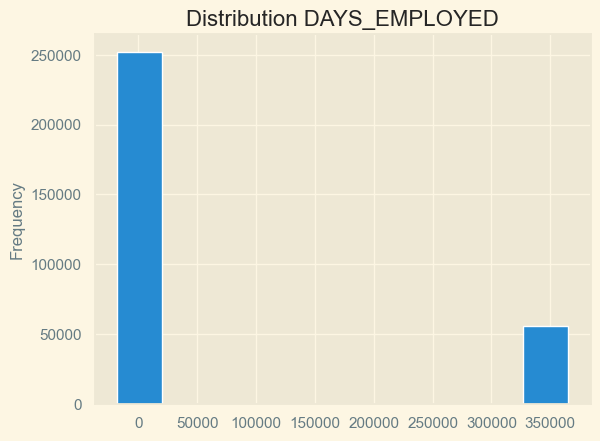

In [285]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Distribution DAYS_EMPLOYED')

/var/folders/3g/rdq178bx3690jwjlb35tlzqw0000gp/T/ipykernel_46288/2191617601.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)


Nombre de valeurs anormales détectées et remplacées : 55374


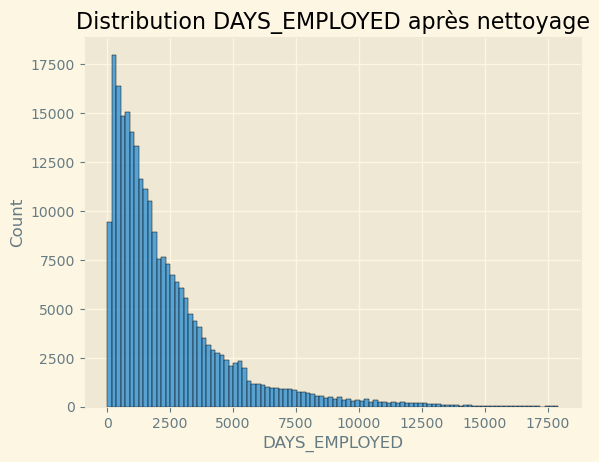

In [22]:
# Créer une nouvelle colonne pour indiquer que la valeur est anormale (365243)
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Remplacer la valeur 365243 par NaN (valeur manquante standard)
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# Afficher la distribution après nettoyage
sns.histplot(-app_train['DAYS_EMPLOYED'], bins=100)
plt.title('Distribution DAYS_EMPLOYED après nettoyage')

# Vérifier combien de valeurs étaient anormales
nb_anomalies = app_train['DAYS_EMPLOYED_ANOM'].sum()
print(f"Nombre de valeurs anormales détectées et remplacées : {nb_anomalies}")


In [287]:
app_train.isna().sum().sum()

8443468

## Valeurs manquantes + normalisation

In [23]:
# Séparer la cible des autres features
y = app_train['TARGET']
X = app_train.drop(columns=['TARGET'])

# Imputation des valeurs manquantes par la médiane
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 4. Normalisation (Min-Max)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_imputed)

# 5. Recréation d’un DataFrame avec les noms d’origine
df = pd.DataFrame(X_scaled, columns=X.columns)

# 6. On rajoute la colonne cible
df['TARGET'] = y.values

In [24]:
imputer

SimpleImputer(strategy='median')

In [25]:
scaler

MinMaxScaler()

In [26]:
df.isna().sum().sum()

0

In [300]:
(df.isna().mean()*100).sort_values(ascending=False)

SK_ID_CURR                               0.0
OCCUPATION_TYPE_Managers                 0.0
OCCUPATION_TYPE_Private service staff    0.0
OCCUPATION_TYPE_Realty agents            0.0
OCCUPATION_TYPE_Sales staff              0.0
                                        ... 
FLAG_DOCUMENT_5                          0.0
FLAG_DOCUMENT_6                          0.0
FLAG_DOCUMENT_7                          0.0
FLAG_DOCUMENT_8                          0.0
TARGET                                   0.0
Length: 244, dtype: float64

In [293]:
df.shape

(307511, 244)

## Corrélation avec Target

In [161]:
# Trouver des corrélations possibles avec la target
correlation = app_train.corr()['TARGET'].sort_values()

In [219]:
correlation.head(15)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
ELEVATORS_AVG                          -0.034199
Name: TARGET, dtype: float64

In [220]:
correlation.tail(15)

OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

In [164]:
# Transformer DAYS_BIRTH en jours positifs
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

Text(0.5, 1.0, 'Distribution de DAYS_BIRTH selon TARGET')

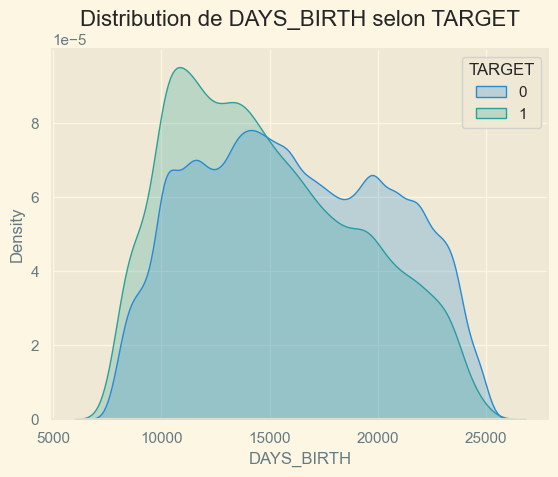

In [165]:
sns.kdeplot(data = app_train, x = 'DAYS_BIRTH', hue = 'TARGET', fill=True, common_norm=False)
plt.title('Distribution de DAYS_BIRTH selon TARGET')

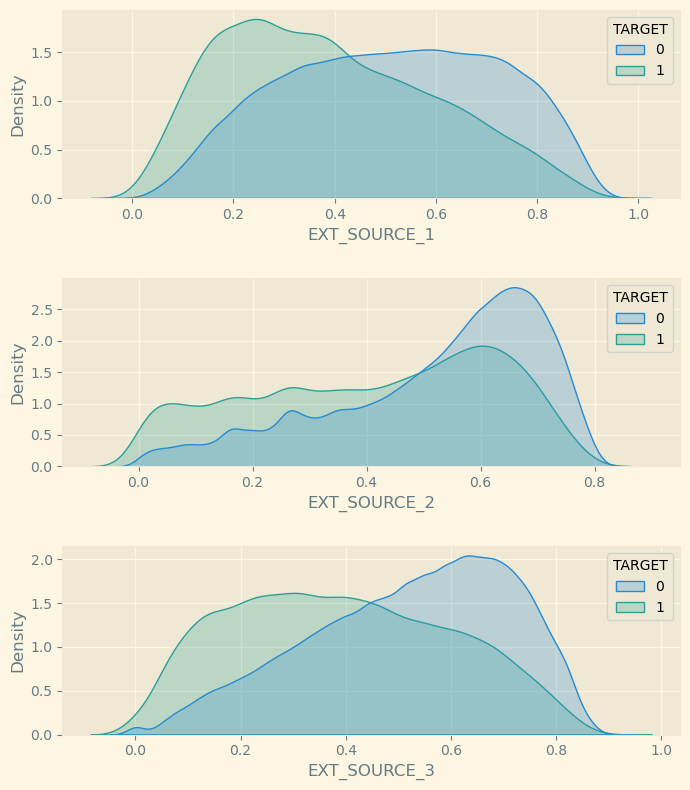

In [36]:
sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
plt.figure(figsize=(7, 8))
for i, source in enumerate(sources):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(data = app_train, x = source, hue = 'TARGET', common_norm=False, fill=True)
    plt.xlabel(source)

plt.tight_layout(h_pad=2.5)

In [27]:
app_train.isna().mean()

SK_ID_CURR                         0.0
TARGET                             0.0
NAME_CONTRACT_TYPE                 0.0
FLAG_OWN_CAR                       0.0
FLAG_OWN_REALTY                    0.0
                                  ... 
WALLSMATERIAL_MODE_Stone, brick    0.0
WALLSMATERIAL_MODE_Wooden          0.0
EMERGENCYSTATE_MODE_No             0.0
EMERGENCYSTATE_MODE_Yes            0.0
DAYS_EMPLOYED_ANOM                 0.0
Length: 244, dtype: float64

# Séparation dara

In [ ]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Séparer en jeu d'entraînement et de test (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reconstituer les DataFrames complets avec la target
train = X_train.copy()
train['TARGET'] = y_train.values

test = X_test.copy()
test['TARGET'] = y_test.values

# Exporter en CSV
train.to_csv('train2.csv', index=False)
test.to_csv('test2.csv', index=False)